## Data Cleaning and Feature Engineering with Google Playstore Dataset

Dataset : - https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv

 Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today.

The data consists of 20 column and 10841 rows.

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Dataset
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Observing shape
df.shape

(10841, 13)

In [4]:
# information and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# checking if there are null values

df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


Observation:
Null values are present.

### 1.Data Cleaning

In [6]:
# we'll perform all our cleaning operations on a copy of dataset
df_copy = df.copy()

Handling 'Reviews' Column


In [7]:
# checking unique values
df_copy['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [8]:
# the datatype of Review feature is object
# it contains numbers as strings

print(df_copy['Reviews'].dtype)

object


In [9]:
# checking if it has all string values as numeric or not
# obv. It has 1 value that is not numeric

print(df_copy['Reviews'].value_counts().sum())
print(df_copy['Reviews'].str.isnumeric().sum())

10841
10840


In [10]:
# finding the value that is not numeric
# obv. value is '3M'
# '~' represents 'not'

df[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
# dropping that 1 row with review as '3.0M'

df_copy = df_copy.drop(df_copy.index[10472])

In [12]:
# Finally converting it to a numeric dtype feature

df_copy['Reviews']=df_copy['Reviews'].astype('int')

print(df_copy['Reviews'].dtype)

int64


Handling 'Size' Column

In [13]:
# checking unique values and dtype

df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [14]:
# Obs. dtype - object
#  It contains a different value 'Varies with device' and mostly values in 'k' (thounsand) units

# First, replace 'M' and 'k' with appropriate values
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '')) * 1e6  # Convert millions
    elif 'k' in size:
        return float(size.replace('k', '')) * 1e3  # Convert thousands
    else:
        return np.nan  # Handle invalid case ('varies with device')

# Apply the function to the 'Size' column
df_copy['Size'] = df_copy['Size'].apply(convert_size)

# Check the updated column
print(df_copy['Size'])

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10836    53000000.0
10837     3600000.0
10838     9500000.0
10839           NaN
10840    19000000.0
Name: Size, Length: 10840, dtype: float64


Handling 'Installs' and 'Price' columns

In [15]:
# checking values in 'Installs' column
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [16]:
# checking values in 'Price' column
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [17]:
# both the columns contains special characters '+', '$', ','

# handling special characters
spl_char = ['+','$',',']
cols_to_clean = ['Installs','Price']

for ch in spl_char:
  for col in cols_to_clean:
    df_copy[col] = df_copy[col].str.replace(ch,'') # to replace ch with empty space

In [18]:
# checking column 'Price'
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [19]:
# checking column 'Installs'
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [20]:
# finally changing datatype
df_copy['Installs']=df_copy['Installs'].astype('int')
df_copy['Price']=df_copy['Price'].astype('float')

print(df_copy['Installs'].dtype)
print(df_copy['Price'].dtype)

int64
float64


Handling 'Last Updated' column

In [21]:
# checking values
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [22]:
# converting into date-time format to extract day, month, and year

df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])

print(df_copy['Last Updated'].dtype)

datetime64[ns]


In [23]:
# extracting day, month and year
df_copy['Last_Updated_day'] = df_copy['Last Updated'].dt.day
df_copy['Last_Updated_month'] = df_copy['Last Updated'].dt.month
df_copy['Last_Updated_year'] = df_copy['Last Updated'].dt.year

In [24]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   App                 10840 non-null  object        
 1   Category            10840 non-null  object        
 2   Rating              9366 non-null   float64       
 3   Reviews             10840 non-null  int64         
 4   Size                9145 non-null   float64       
 5   Installs            10840 non-null  int64         
 6   Type                10839 non-null  object        
 7   Price               10840 non-null  float64       
 8   Content Rating      10840 non-null  object        
 9   Genres              10840 non-null  object        
 10  Last Updated        10840 non-null  datetime64[ns]
 11  Current Ver         10832 non-null  object        
 12  Android Ver         10838 non-null  object        
 13  Last_Updated_day    10840 non-null  int32         


In [25]:
# Number of unique values per column
print(df_copy.nunique())

App                   9659
Category                33
Rating                  39
Reviews               6001
Size                   459
Installs                20
Type                     2
Price                   92
Content Rating           6
Genres                 119
Last Updated          1377
Current Ver           2831
Android Ver             33
Last_Updated_day        31
Last_Updated_month      12
Last_Updated_year        9
dtype: int64


In [26]:
# finally exporting the cleaned dataset into csv file
df_copy.to_csv('Google_Playstore_Dataset_Cleaned.csv')

### Exploratory Data Analysis (EDA)

In [27]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_day,Last_Updated_month,Last_Updated_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [28]:
# examining and dropping duplicates (if found)

df_copy[df_copy.duplicated('App')].shape

(1181, 16)

In [29]:
# dropping duplicate columns
df_copy = df_copy.drop_duplicates(subset=['App'], keep='first')
print(df_copy.shape)

(9659, 16)


#### Exploring Dataset

In [30]:
# seggregating categorical and numerical feature/columns

categorical_features =  [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O' ]
numerical_features =  [feature for feature in df_copy.columns if df_copy[feature].dtype !='O' ]

# printing columns
print('Categorical Features ( total= {} ) : {} '.format(len(categorical_features),categorical_features))
print('Numerical Features ( total= {} ) : {} '.format(len(numerical_features),numerical_features))

Categorical Features ( total= 7 ) : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver'] 
Numerical Features ( total= 9 ) : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Last_Updated_day', 'Last_Updated_month', 'Last_Updated_year'] 


#### 3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [31]:
# proportion of count of data in categorical columns
for col in categorical_features:
  print(df_copy[col].value_counts(normalize=True)*100)
  print('\n----------------------------------------\n')

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64

----------------------------------------

Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE        

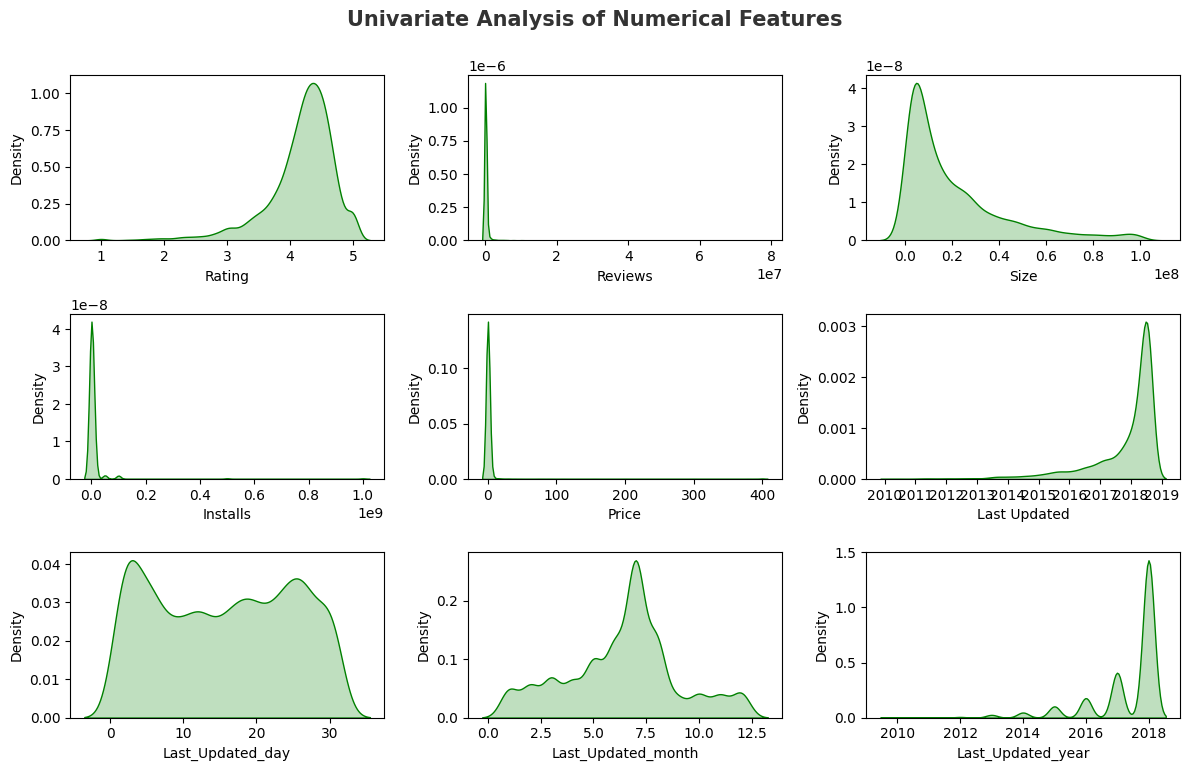

In [32]:
## Proportion of count data on numerical columns

plt.figure(figsize=(12,12))
plt.suptitle(t='Univariate Analysis of Numerical Features', fontsize=15, fontweight='bold', alpha=0.8, y=1)

for i in range(0,len(numerical_features)):
  plt.subplot(5,3,i+1)
  sns.kdeplot(x= df_copy[numerical_features[i]], fill=True, color='g')
  plt.xlabel(numerical_features[i])
  plt.tight_layout()

In [33]:
# Observations:
# Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed

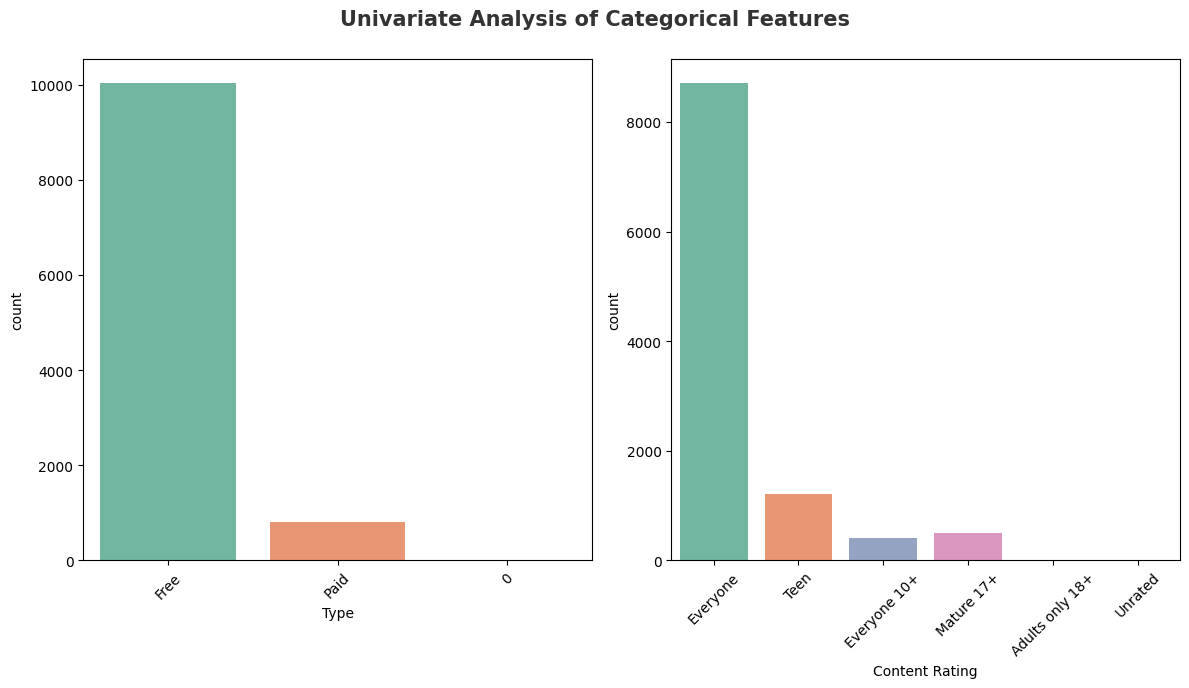

In [34]:
import warnings
warnings.filterwarnings('ignore')

# categorical columns
plt.figure(figsize=(12, 12))
plt.suptitle(t='Univariate Analysis of Categorical Features', fontsize=15, fontweight='bold', alpha=0.8, y=1.)

category = [ 'Type', 'Content Rating']

for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### Some EDA in form of Questions

<Axes: ylabel='count'>

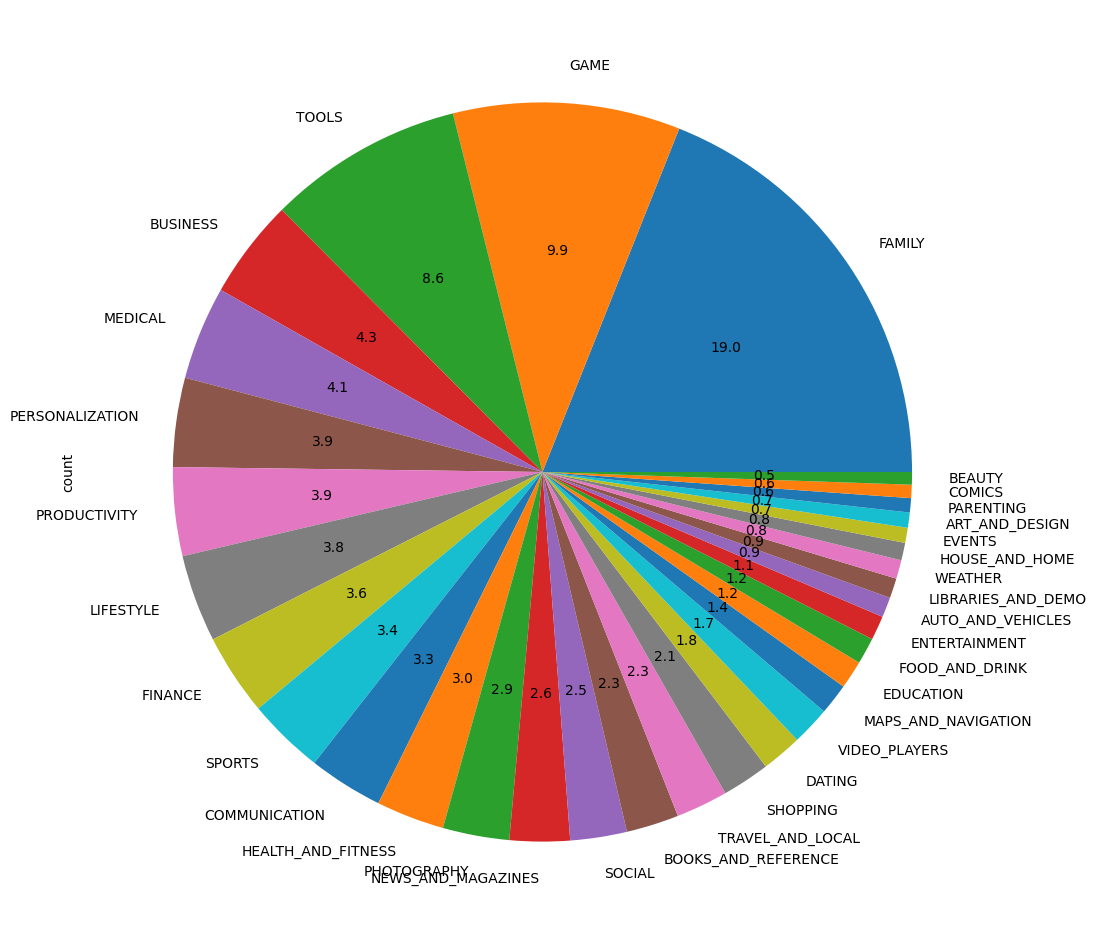

In [35]:
# 1. Which is the most popular app category?

df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(12,12),autopct='%1.1f')

In [36]:
# Answer
# 1. There are more kinds of apps in playstore which are under category of family, games & tools.
# 2. Beatuty,comics,arts and weather kinds of apps are very less in playstore.

In [37]:
## 2. What are top 10 App Categories?


category = pd.DataFrame(df_copy['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

print(category)

                     count
Category                  
FAMILY                1832
GAME                   959
TOOLS                  827
BUSINESS               420
MEDICAL                395
PERSONALIZATION        376
PRODUCTIVITY           374
LIFESTYLE              369
FINANCE                345
SPORTS                 325
COMMUNICATION          315
HEALTH_AND_FITNESS     288
PHOTOGRAPHY            281
NEWS_AND_MAGAZINES     254
SOCIAL                 239
BOOKS_AND_REFERENCE    222
TRAVEL_AND_LOCAL       219
SHOPPING               202
DATING                 171
VIDEO_PLAYERS          163
MAPS_AND_NAVIGATION    131
EDUCATION              119
FOOD_AND_DRINK         112
ENTERTAINMENT          102
AUTO_AND_VEHICLES       85
LIBRARIES_AND_DEMO      84
WEATHER                 79
HOUSE_AND_HOME          74
EVENTS                  64
ART_AND_DESIGN          64
PARENTING               60
COMICS                  56
BEAUTY                  53


Text(0.5, 1.0, 'Most Popular Categories in Play Store')

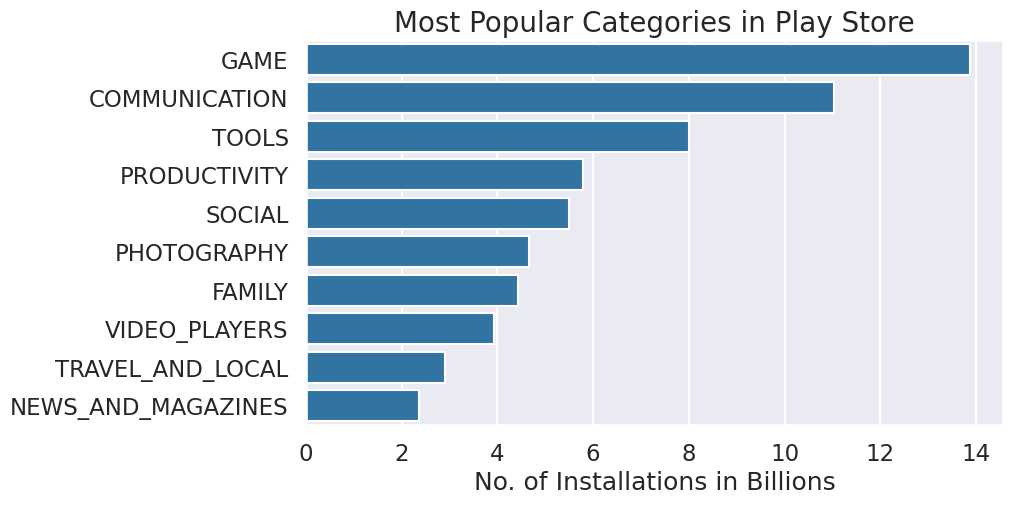

In [38]:
# 3. Which Category has largest number of installations?

df_cat_installs = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000# converting into billions
df2 = df_cat_installs.head(10)
plt.figure(figsize = (9,5))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

In [39]:
# Insights
# 1. Out of all the categories "GAME" has the most number of Installations.
# 2. With almost 35 Billion Installations GAME is the most popular Category in Google App store

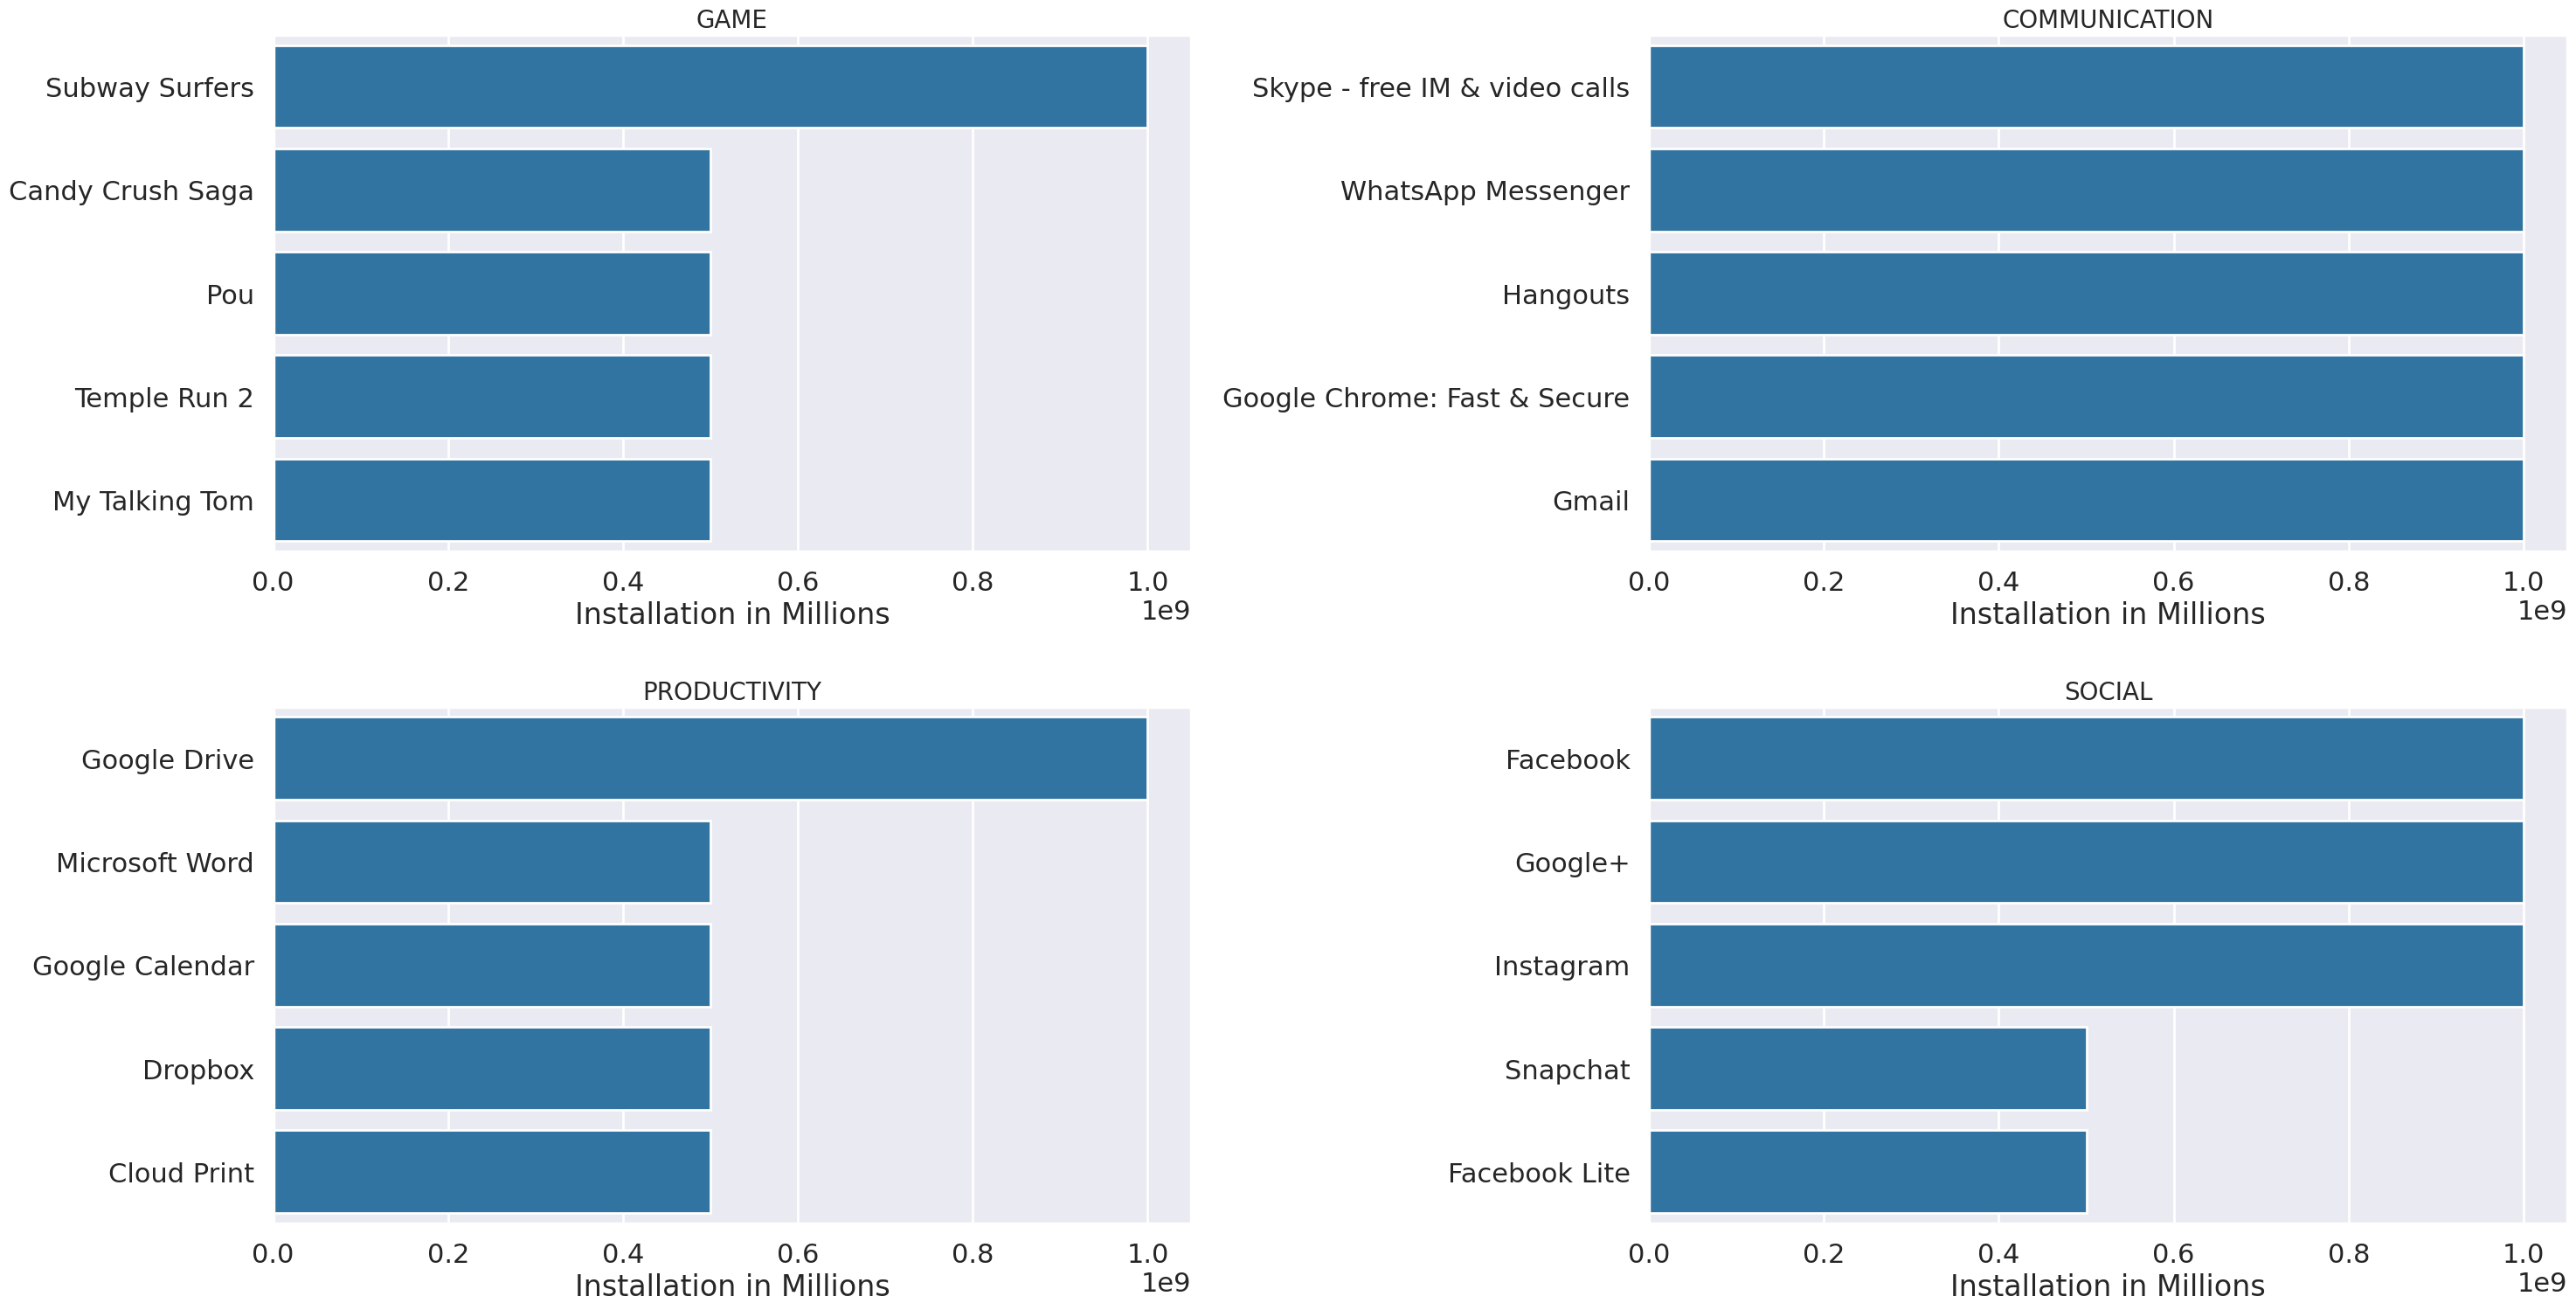

In [40]:
# 4. What are the Top 5 most installed Apps in Each popular Categories ?

dfa = df_copy.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(30,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

In [41]:
# Insights
# - Most popular game is Subway Surfers.
# - Most popular communication app is Hangouts.
# - Most popular productivity app is Google Drive.
# - Most popular social app is Instagram.

In [42]:
# 5. How many apps are there on Google Play Store which get 5 ratings?

rating = df_copy.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()

toprating_apps = rating[rating.Rating == 5.0]
print("Number of 5 rated apps",toprating_apps.shape[0])
toprating_apps.head(1)

Number of 5 rated apps 271


,Category,Installs,App,Rating
0,FAMILY,1000,CS & IT Interview Questions,5.0


In [44]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   App                 9659 non-null   object        
 1   Category            9659 non-null   object        
 2   Rating              8196 non-null   float64       
 3   Reviews             9659 non-null   int64         
 4   Size                8432 non-null   float64       
 5   Installs            9659 non-null   int64         
 6   Type                9658 non-null   object        
 7   Price               9659 non-null   float64       
 8   Content Rating      9659 non-null   object        
 9   Genres              9659 non-null   object        
 10  Last Updated        9659 non-null   datetime64[ns]
 11  Current Ver         9651 non-null   object        
 12  Android Ver         9657 non-null   object        
 13  Last_Updated_day    9659 non-null   int32         
 

## Case Study 1

**A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?**



To approach this task, I would analyze the **Google Playstore dataset** by focusing on key features such as:

- **Category**: To identify different app categories.
- **Installs**: To measure app popularity.
- **Reviews**: To gauge user engagement and satisfaction.
- **Rating**: To assess the quality and user approval of apps.

I would begin with data cleaning and perform exploratory data analysis (EDA) to determine the most popular categories based on installs, reviews, and ratings. Finally, I would recommend app categories that have both high downloads and user satisfaction, helping the company make informed decisions for launching their app.